In [33]:
#importing necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix
from scipy import stats

In [34]:
from google.colab import drive

# Mount Google Drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [35]:
# Load dataset
DATA_PATH = '/content/drive/MyDrive/data/dataset.csv'
data = pd.read_csv(DATA_PATH)

In [36]:
# Print data information
print("**Data Exploration**")
print(f"\nHead:\n{data.head()}")
print(f"\nInfo:\n{data.info()}")
print(f"\nTail:\n{data.tail()}")
print(f"\nDescribe:\n{data.describe()}")
# Preprocessing
# Check for missing values
missing_values = data.isnull().sum()
print("\nMissing Values:")
print(missing_values)

# Drop rows with missing values
data.dropna(inplace=True)
# Model 3: Logistic Regression
logreg_model = LogisticRegression(max_iter=1000)
logreg_model.fit(X_train_scaled, y_train)
# Making predictions
knn_pred = knn_model.predict(X_test_scaled)
rf_pred = rf_model.predict(X_test_scaled)
logreg_pred = logreg_model.predict(X_test_scaled)



**Data Exploration**

Head:
   very_dry_skin  sores_that_heal_slowly  more_infections_than_usual  nausea  \
0              1                       1                           1       1   
1              1                       1                           1       1   
2              1                       1                           1       1   
3              1                       1                           1       1   
4              1                       1                           1       1   

   stomach_pains  urinate_a_lot  feel_very_thirsty  \
0              1              0                  0   
1              1              0                  0   
2              1              1                  0   
3              1              0                  0   
4              1              1                  1   

   lose_weight_without_trying  blurry_vision  itching_hands_or_feet  ...  \
0                           0              0                      0  ...   
1             

In [37]:
# Preprocessing
# Check for missing values
missing_values = data.isnull().sum()
print("\nMissing Values:")
print(missing_values)

# Drop rows with missing values
data.dropna(inplace=True)


Missing Values:
very_dry_skin                        0
sores_that_heal_slowly               0
more_infections_than_usual           0
nausea                               0
stomach_pains                        0
urinate_a_lot                        0
feel_very_thirsty                    0
lose_weight_without_trying           0
blurry_vision                        0
itching_hands_or_feet                0
feel_very_hungry                     0
fever                                0
fatigue                              0
loss_of_appetite                     0
vomiting                             0
abdominal_pain                       0
dark_urine                           0
light_colored_stools                 0
joint_pain                           0
jaundice                             0
rash                                 0
bone_pain                            0
joint_pain.1                         0
muscle_pain                          0
cramp                                0
eye_pain

In [39]:
# Splitting the data into features (X) and target (y)
X = data.drop(columns=['disease'])  # Features
y = data['disease']  # Target


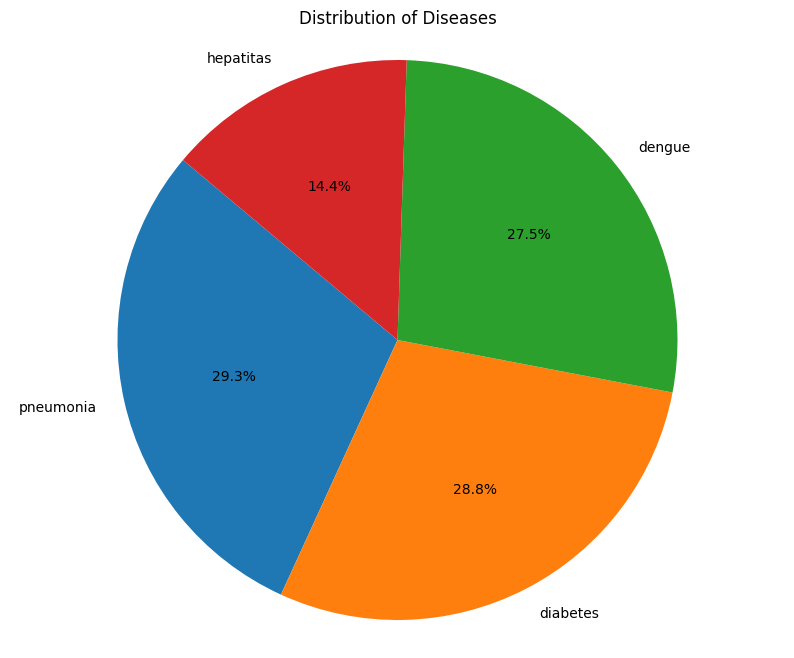

In [40]:
# Create pie chart for disease distribution
disease_counts = y.value_counts()
plt.figure(figsize=(10, 8))
plt.pie(disease_counts, labels=disease_counts.index, autopct='%1.1f%%', startangle=140)
plt.title('Distribution of Diseases')
plt.axis('equal')
plt.show()  # Explicitly show the plot


In [43]:
# Splitting the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [42]:
# Check for any non-numeric values in the dataset
non_numeric_values = X_train.apply(pd.to_numeric, errors='coerce').isnull().sum()
print("Non-numeric values in the dataset:")
print(non_numeric_values)


Non-numeric values in the dataset:
very_dry_skin                        0
sores_that_heal_slowly               0
more_infections_than_usual           0
nausea                               0
stomach_pains                        0
urinate_a_lot                        0
feel_very_thirsty                    0
lose_weight_without_trying           0
blurry_vision                        0
itching_hands_or_feet                0
feel_very_hungry                     0
fever                                0
fatigue                              0
loss_of_appetite                     0
vomiting                             0
abdominal_pain                       0
dark_urine                           0
light_colored_stools                 0
joint_pain                           0
jaundice                             0
rash                                 0
bone_pain                            0
joint_pain.1                         0
muscle_pain                          0
cramp                        

In [44]:
# Standardizing the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


In [45]:
# Model 1: K-Nearest Neighbors (KNN)
knn_model = KNeighborsClassifier(n_neighbors=5)
knn_model.fit(X_train_scaled, y_train)


KNeighborsClassifier()

In [46]:
# Model 2: Random Forest
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train_scaled, y_train)



RandomForestClassifier(random_state=42)

In [47]:
# Model 3: Logistic Regression
logreg_model = LogisticRegression(max_iter=1000)
logreg_model.fit(X_train_scaled, y_train)

LogisticRegression(max_iter=1000)

In [48]:
# Making predictions
knn_pred = knn_model.predict(X_test_scaled)
rf_pred = rf_model.predict(X_test_scaled)
logreg_pred = logreg_model.predict(X_test_scaled)


In [49]:
# Evaluating models
knn_accuracy = accuracy_score(y_test, knn_pred)
rf_accuracy = accuracy_score(y_test, rf_pred)
logreg_accuracy = accuracy_score(y_test, logreg_pred)

print("KNN Accuracy:", knn_accuracy)
print("Random Forest Accuracy:", rf_accuracy)
print("Logistic Regression Accuracy:", logreg_accuracy)

KNN Accuracy: 1.0
Random Forest Accuracy: 1.0
Logistic Regression Accuracy: 1.0


In [50]:
# Evaluating models
knn_accuracy_percentage = knn_accuracy * 100
rf_accuracy_percentage = rf_accuracy * 100
logreg_accuracy_percentage = logreg_accuracy * 100

print("KNN Accuracy:", knn_accuracy_percentage, "%")
print("Random Forest Accuracy:", rf_accuracy_percentage, "%")
print("Logistic Regression Accuracy:", logreg_accuracy_percentage, "%")


KNN Accuracy: 100.0 %
Random Forest Accuracy: 100.0 %
Logistic Regression Accuracy: 100.0 %


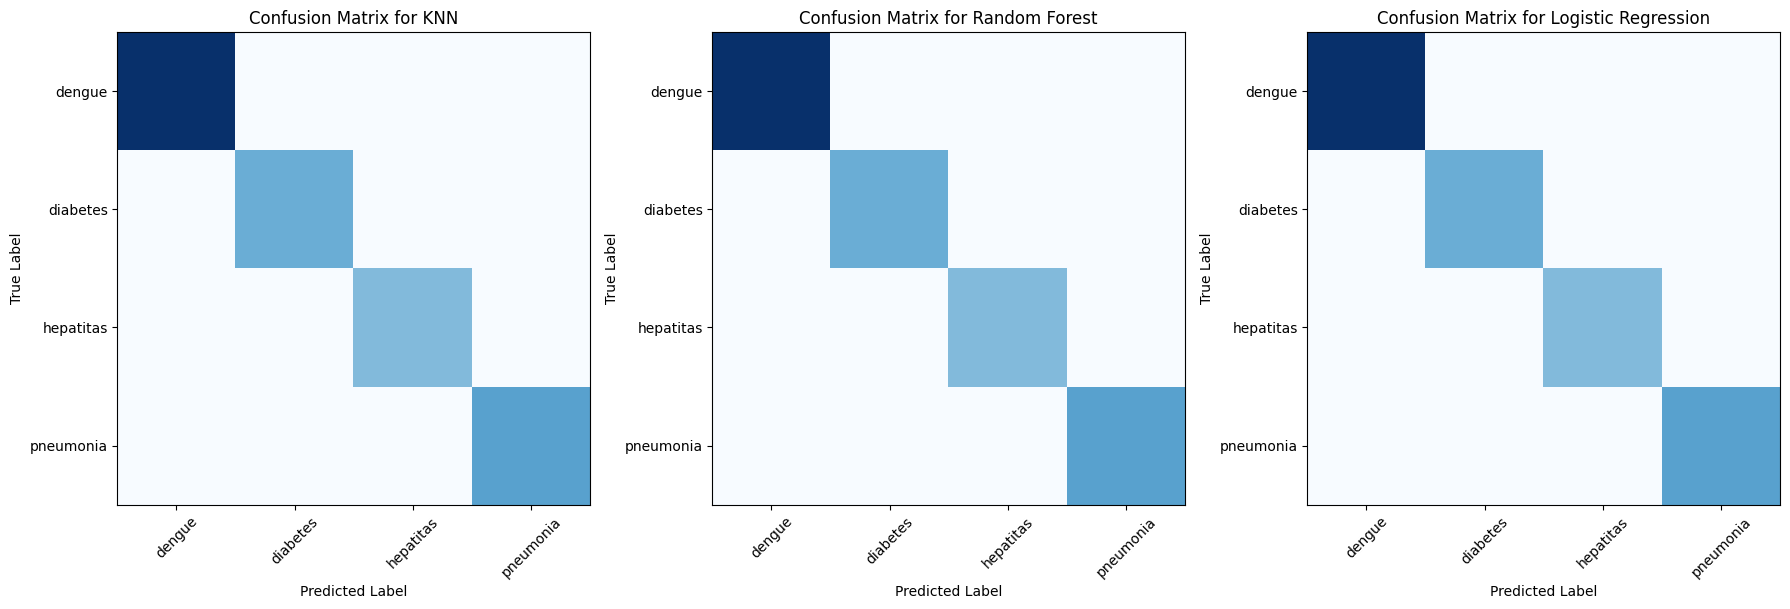

In [51]:
# Confusion matrix for KNN
knn_cm = confusion_matrix(y_test, knn_pred)

# Confusion matrix for Random Forest
rf_cm = confusion_matrix(y_test, rf_pred)

# Confusion matrix for Logistic Regression
logreg_cm = confusion_matrix(y_test, logreg_pred)

# Plotting confusion matrices
fig, axes = plt.subplots(1, 3, figsize=(18, 6))

# Plotting confusion matrix for KNN
axes[0].imshow(knn_cm, interpolation='nearest', cmap=plt.cm.Blues)
axes[0].set_title('Confusion Matrix for KNN')
axes[0].set_xlabel('Predicted Label')
axes[0].set_ylabel('True Label')
axes[0].set_xticks(np.arange(len(set(y))), set(y))
axes[0].set_yticks(np.arange(len(set(y))), set(y))
axes[0].tick_params(axis='x', rotation=45)

# Plotting confusion matrix for Random Forest
axes[1].imshow(rf_cm, interpolation='nearest', cmap=plt.cm.Blues)
axes[1].set_title('Confusion Matrix for Random Forest')
axes[1].set_xlabel('Predicted Label')
axes[1].set_ylabel('True Label')
axes[1].set_xticks(np.arange(len(set(y))), set(y))
axes[1].set_yticks(np.arange(len(set(y))), set(y))
axes[1].tick_params(axis='x', rotation=45)

# Plotting confusion matrix for Logistic Regression
axes[2].imshow(logreg_cm, interpolation='nearest', cmap=plt.cm.Blues)
axes[2].set_title('Confusion Matrix for Logistic Regression')
axes[2].set_xlabel('Predicted Label')
axes[2].set_ylabel('True Label')
axes[2].set_xticks(np.arange(len(set(y))), set(y))
axes[2].set_yticks(np.arange(len(set(y))), set(y))
axes[2].tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()

In [62]:


input_features = [
    [1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],  # Example input feature vector with 34 features
    [1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0],  # Another example input feature vector with 34 features
    # Add more input feature vectors as needed
]

# Standardize input features
X_input_scaled = scaler.transform(input_features)

# Make predictions
knn_pred_input = knn_model.predict(X_input_scaled)
rf_pred_input = rf_model.predict(X_input_scaled)
logreg_pred_input = logreg_model.predict(X_input_scaled)

print("KNN Predictions for input features:", knn_pred_input)
print("Random Forest Predictions for input features:", rf_pred_input)
print("Logistic Regression Predictions for input features:", logreg_pred_input)


KNN Predictions for input features: ['diabetes' 'dengue']
Random Forest Predictions for input features: ['diabetes' 'diabetes']
Logistic Regression Predictions for input features: ['diabetes' 'dengue']


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
